# Research on car sales ads

The database will be checked for erroneous data and null values. The data collected over the past few years will be examined and determined what factors influence the price of a car. will examine how many days the ad was shown. Will be analyzed the number of ads and the average price for a popular type of car. What factors influence the price the most.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Research-on-car-sales-ads" data-toc-modified-id="Research-on-car-sales-ads-1">Research on car sales ads</a></span><ul class="toc-item"><li><span><a href="#Step-1.-Open-the-data-file-and-study-the-general-information." data-toc-modified-id="Step-1.-Open-the-data-file-and-study-the-general-information.-1.1">Step 1. Open the data file and study the general information.</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-1" data-toc-modified-id="Conclusion-step-1-1.1.1">Conclusion step 1</a></span></li></ul></li><li><span><a href="#Step-2.-Data-preprocessing" data-toc-modified-id="Step-2.-Data-preprocessing-1.2">Step 2. Data preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-2" data-toc-modified-id="Conclusion-step-2-1.2.1">Conclusion step 2</a></span></li></ul></li><li><span><a href="#Step-3.-Make-calculations-and-add-them-to-the-table" data-toc-modified-id="Step-3.-Make-calculations-and-add-them-to-the-table-1.3">Step 3. Make calculations and add them to the table</a></span><ul class="toc-item"><li><span><a href="#Conclusion-step-3" data-toc-modified-id="Conclusion-step-3-1.3.1">Conclusion step 3</a></span></li></ul></li><li><span><a href="#Step-4.-Carry-out-exploratory-data-analysis" data-toc-modified-id="Step-4.-Carry-out-exploratory-data-analysis-1.4">Step 4. Carry out exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Step-5.-Overall-conclusion" data-toc-modified-id="Step-5.-Overall-conclusion-1.4.1">Step 5. Overall conclusion</a></span></li><li><span><a href="#Project-completion-checklist" data-toc-modified-id="Project-completion-checklist-1.4.2">Project completion checklist</a></span></li></ul></li></ul></li></ul></div>

## Step 1. Open the data file and study the general information. 

In [8]:
import pandas as pd
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [9]:
data = pd.read_csv('vehicles_us.csv')
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


price    model_year     cylinders       odometer   is_4wd  \
count   51525.000000  47906.000000  46265.000000   43633.000000  25572.0   
mean    12132.464920   2009.750470      6.125235  115553.461738      1.0   
std     10040.803015      6.282065      1.660360   65094.611341      0.0   
min         1.000000   1908.000000      3.000000       0.000000      1.0   
25%      5000.000000   2006.000000      4.000000   70000.000000      1.0   
50%      9000.000000   2011.000000      6.000000  113000.000000      1.0   
75%     16839.000000   2014.000000      8.000000  155000.000000      1.0   
max    375000.000000   2019.000000     12.000000  990000.000000      1.0   

       days_listed  
count  51525.00000  
mean      39.55476  
std       28.20427  
min        0.00000  
25%       19.00000  
50%       33.00000  
75%       53.00000  
max      271.00000

In [10]:
data.head()

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28

### Conclusion step 1

at first look i saw that in price minimum is 1$. Minimum model year is 1908, need will be see what is car. Odometer has minimum 0. 4wd have only 1.
And data have NaN values.

## Step 2. Data preprocessing

In [11]:
data.drop(index=data.index[data['price'] == 1], inplace=True)
data.reset_index(drop=True, inplace=True)

Price in 1$ have 1,5%. I drop it.

In [12]:
model = data[data['model_year'].isnull()]['model'].unique()
# get series of model witch have NaN in model year
for i in model:
    # get median for each model
    median = data[data['model'] == i]['model_year'].median()
    data['model_year'].loc[data['model'] == i] = data[data['model']
                                                      == i]['model_year'].fillna(value=median)
    # fill median for each model

In model_year data have 3567 rows. I changed NaN to an median by calculating it for each model.

In [13]:
data.drop(index=data.index[data['model_year'] < 1949], inplace=True)
data.reset_index(drop=True, inplace=True)

i delete this row because this models didn't make in this year. (quick check in wikipedia)

In [14]:
model = data[data['cylinders'].isnull()]['model'].unique()
# get series of model witch have NaN in cylinders
for i in model:
    # get median for each model
    median = data[data['model'] == i]['cylinders'].median()
    data['cylinders'].loc[data['model'] == i] = data[data['model']
                                                     == i]['cylinders'].fillna(value=median)
    # fill median for each model

In cylinders data have 5189 rows. I changed NaN to an median by calculating it for each model.

In [15]:
data['is_4wd'] = data['is_4wd'].fillna(value=False)
data['is_4wd'][data['is_4wd'] == 1] = True

We have only 1 and NaN values. Changed 1 to True and NaN to False as logic like have or doesn't 4wd.

In [16]:
data[['model_year', 'cylinders']] = data[[
    'model_year', 'cylinders', ]].astype('int64')
data[['model_year', 'cylinders']] = data[[
    'model_year', 'cylinders', ]].astype('int64')
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')

Change model_year and cylinders in int type. Also date posted to datetime format.

### Conclusion step 2
Data have a lot of strange information, like year when cars didn't made. Price for cars by 1$. Was a lot data with None information. I changed data type for better.
## Step 3. Make calculations and add them to the table

In [17]:
data['year'] = pd.DatetimeIndex(data['date_posted']).year
# made new column with year of ads add
data['month'] = pd.DatetimeIndex(data['date_posted']).month
# made new column with name of mounth of ads add
data['day'] = pd.DatetimeIndex(data['date_posted']).day_name()
# made new column with name of day of ads add
data['vehicle_age'] = data['year'] - data['model_year']
# calculated vehicle age when ads add
data['average_mileage'] = round(data['odometer'] / data['vehicle_age'])
# calculate average mileage per year for each car
data['average_mileage'].replace(np.inf, np.nan, inplace=True)
# when the car is new, division by 0. Change inf to NaN

Make calculations with date and mileage.

In [18]:
data['average_mileage_for_model'] = data.groupby(
    'model')['average_mileage'].transform(lambda grp: grp.median())
# made column with average mileage for each model
data['average_mileage'] = (data['average_mileage'].where(((data['average_mileage'].notnull()) & (
    data['average_mileage'] != 0)), data['average_mileage_for_model']))
# fill NaN and 0 in average_mileage from average_mileage_for_model
data['odometer'] = (data['odometer'].where(((data['odometer'].notnull()) & (
    data['odometer'] != 0)), data['average_mileage']*data['vehicle_age']))
# calculated odometer by multiplying average_mileage to vehicle_age in rows with NaN or 0
# deleted the column because it is no longer needed
data.drop(['average_mileage_for_model'], axis=1, inplace=True)

In [19]:
data.drop(index=data.index[data['model'] ==
                           'mercedes-benz benze sprinter 2500'], inplace=True)
data.reset_index(inplace=True, drop=True)
data[['odometer', 'average_mileage']] = data[[
    'odometer', 'average_mileage', ]].astype('int64')

After calculeted odometer i find one model with NaN. It's looks like error or duplicate. 41 rows deleted with this model. 
Changed type to int for odometer and average_mileage.


In [20]:
data['condition'] = data['condition'].replace(to_replace=(
    'new', 'like new', 'excellent', 'good', 'fair', 'salvage'), value=(5, 4, 3, 2, 1, 0))

Changed condition to numbers from 5 to 0.

### Conclusion step 3
managed to restore the approximate mileage for many ads. Changed the machine condition data to a numerical parameter for the convenience of building histograms.
## Step 4. Carry out exploratory data analysis

Determined the upper limits of outliers. Price below 100 above  45000$, vehicle_age upper 30 years. cylinders below 4 and above 10, odometer upper 360000 and condition below 0 above 5. This data small and not significant.

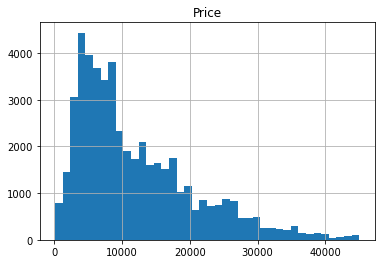

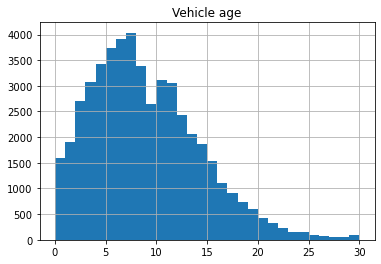

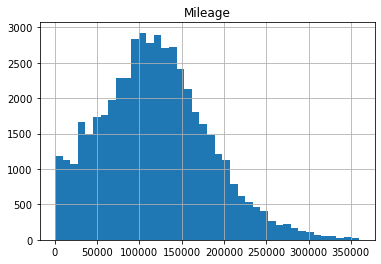

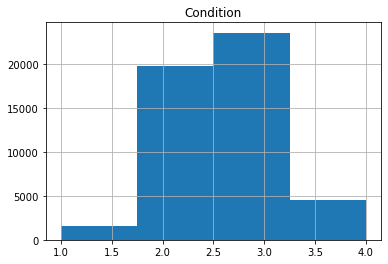

In [21]:
import matplotlib.pyplot as plt
filter_data = data.query("100 < price <= 45000 & vehicle_age <= 30 & 4 <= cylinders <= 10 & odometer <= 360000 & 0 < condition < 5")
filter_data.hist('price', bins=40);
plt.title('Price')
filter_data.hist('vehicle_age', bins=30);
plt.title('Vehicle age')
filter_data.hist('cylinders', bins = 5);
plt.title('Cylinders')
filter_data.hist('odometer', bins=40);
plt.title('Mileage')
filter_data.hist('condition', bins = 4);
plt.title('Condition');

In [32]:
#px.histogram(filter_data, x="price", nbins=40)
import cufflinks as cf
#filter_data.iplot('price', bins=40, kind='histogram');
cf.set_config_file(theme='white',sharing='public',offline=False)
filter_data.iplot(kind='histogram', keys=['price'])

In [31]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [38]:
px.histogram(filter_data, x='vehicle_age', nbins=35, labels={'x':'bla', 'y':'bbb'})

In [39]:
px.histogram(filter_data, x='cylinders', nbins=6)

In [40]:
px.histogram(filter_data, x='odometer', nbins=40)

In [41]:
px.histogram(filter_data, x='condition', nbins=6)

Made filtered df without the upper limits of outliers. Made new gistograms.  More cars with price about 4000$, 7 age, 6 and 8 cylinders with mileage about 120000, and excellent condition. 

In [42]:
filter_data['days_listed'].describe()

count    49485.000000
mean        39.561140
std         28.218938
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

In [43]:
filter_data = filter_data.query("days_listed < 160")
filter_data.hist('days_listed', bins=30);
plt.title('Days listed');

days_listed above 160 small and not significant. Many cars sold about 19 days.

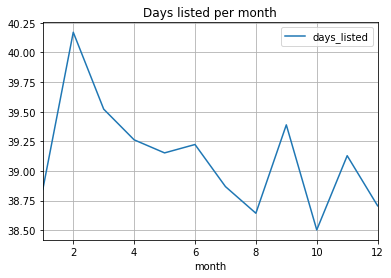

In [44]:
filter_data.pivot_table(index='month', values='days_listed').sort_values(by='month').plot(grid=True);
plt.title('Days listed per month');

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Please don't forget to give title to your plots 😉

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>

When we use df.hist to add titel need import matplotlib.pyplot. In df.plot we have titel parameter. That mean will be better use plot for all graf?
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

`plt.title()` method is commonly used. I think it is convenient that the line for the graph is small, and all the additional parameters are in other lines.

</div>

in october cars sold more quickly than in february.

In [45]:
type_cars = filter_data[['type', 'price']]
type_cars.groupby('type').median().sort_values('price', ascending=False)

price
type              
truck        14995
pickup       14400
coupe        13900
offroad      11800
convertible  11250
bus          10500
other         8995
SUV           8990
van           7925
wagon         7900
mini-van      6495
hatchback     5995
sedan         5995

top 3 cars with hightes price is truck, pickup and coupe.

In [46]:
#type_cars.groupby('type').count().plot(kind='pie', subplots=True, figsize=(7,7), autopct='%.2f');
type_cars.groupby('type').count().plot(kind='bar', title='count of type of cars ratio');

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

A pie chart is very rarely a good choice for a chart. I would recommend barplot.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
chage for bar</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Much better, thank you!

</div>

top 3 ads counts for SUV, sedan and truck.

In [47]:
filter_data.loc[filter_data['type'] == 'SUV']['paint_color'].value_counts() #found colour with less 50 ads.

black     2109
white     1900
silver    1513
grey      1155
blue      1013
red        881
green      424
brown      363
custom     277
orange      84
yellow      48
purple      39
Name: paint_color, dtype: int64

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Great, you found rare colors! But it would be also nice to print `value_count()` for the 'transmission' column to be sure that there are more than 50 values in each category.

</div>

In [39]:
filter_data.loc[filter_data['type'] == 'SUV']['transmission'].value_counts() #found transmission with less 50 ads.

automatic    11372
manual         491
other           93
Name: transmission, dtype: int64

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

👍

</div>

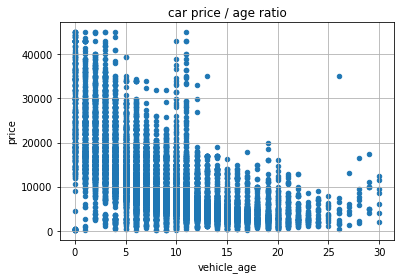

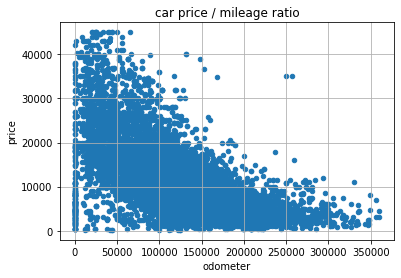

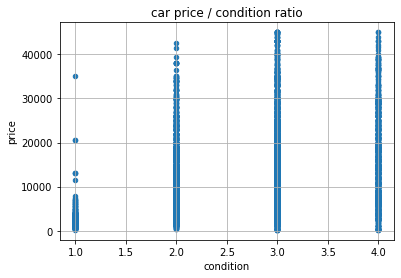

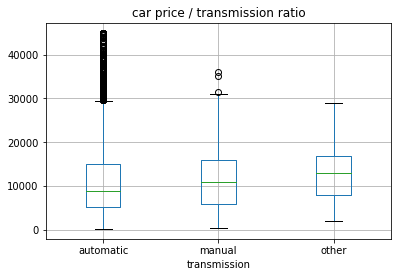

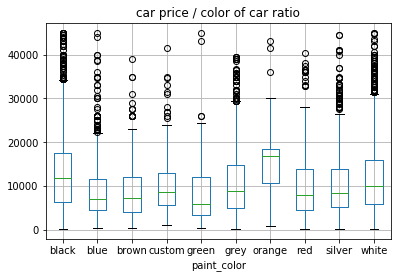

In [62]:
SUV_filter = filter_data.query('paint_color != "yellow" & paint_color != "purple" & type == "SUV"')
SUV_filter.plot(kind='scatter', y='price', x='vehicle_age', grid=True, title='car price / age ratio');
SUV_filter.plot(kind='scatter', y='price', x='odometer', grid=True, title='car price / mileage ratio');
SUV_filter.plot(kind='scatter', y='price', x='condition', grid=True, title='car price / condition ratio');
SUV_filter.boxplot(column ='price', by='transmission');
plt.title('car price / transmission ratio')      
plt.suptitle("")
SUV_filter.boxplot(column = 'price', by='paint_color');
plt.title('car price / color of car ratio')
plt.suptitle("");

In [70]:
px.box(SUV_filter, y='price', x='paint_color')

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> 

<s>Please, add titles to the plots.</s>

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Excellent!

</div>

For SUV type more high price for new cars. 10 year also have high price. I think people after 10 year want to sold cars and we have a lot of ads. we see a direct dependence of the price on the mileage. like with condition. price for manual transmission is more high than automatic. Orange and black cars more expencive.

In [41]:
filter_data.loc[filter_data['type'] == 'sedan']['paint_color'].value_counts()#found colour with less 50 ads.

silver    2022
black     1724
grey      1598
white     1452
blue      1201
red        905
custom     263
brown      257
green      205
purple      26
yellow      23
orange       9
Name: paint_color, dtype: int64

In [42]:
filter_data.loc[filter_data['type'] == 'sedan']['transmission'].value_counts() #found transmission with less 50 ads.

automatic    11153
manual         579
other           73
Name: transmission, dtype: int64

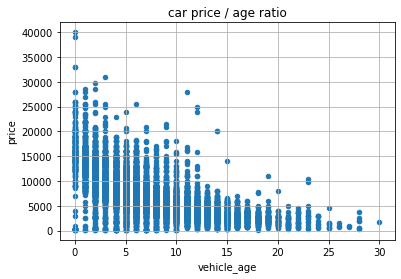

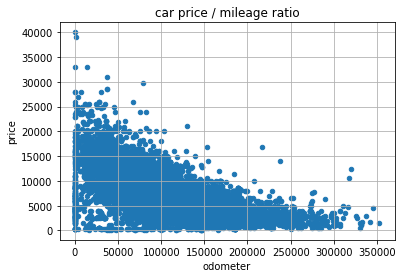

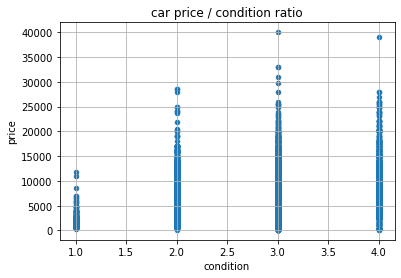

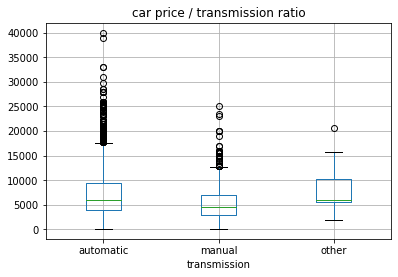

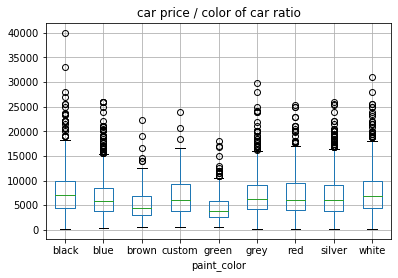

In [43]:
sedan_filter = filter_data.query('paint_color != "yellow" & paint_color != "purple" & paint_color != "orange" & type == "sedan"')
sedan_filter.plot(kind='scatter', y='price', x='vehicle_age', grid=True, title='car price / age ratio');
sedan_filter.plot(kind='scatter', y='price', x='odometer', grid=True, title='car price / mileage ratio');
sedan_filter.plot(kind='scatter', y='price', x='condition', grid=True, title='car price / condition ratio');
sedan_filter.boxplot(column ='price', by='transmission');
plt.title('car price / transmission ratio')      
plt.suptitle("")
sedan_filter.boxplot(column = 'price', by='paint_color');
plt.title('car price / color of car ratio')
plt.suptitle("");

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> 

<s>Again, titles, please :)</s>

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add %)</div>

the sedan has a more linear age-price ratio than the suv. Like a odometer-price ration. Exelent condiion have more higt price then like new car. I think it is because more ads with exelent condition. price for automatic transmission is more high than manual. Black and with cars more expencive.

### Step 5. Overall conclusion

Data have a lot of strange information. need to make important data such as mileage, make age required when filling out. The database contained ads with a price for the car below 100 dollars. I recognized this data as erroneous.
For many ads, the number of cylinders, year of car production, mileage were calculated.
age and mileage affect the price the most. the color and type of transmission affects depending on the type of vehicle. in the spring, cars sell better, worse in winter. A lot of cars with a price of about $ 4000, age 7, 6 and 8 cylinders with mileage of about 120,000, in excellent condition.
Highest average price for truck (14995) pickup (14400) and coupe (13900)
The most popular types of cars in ads are SUVs, sedans and trucks.
for SUV and sedan, study was conducted on the ratio of price and age (the younger the more expensive), price and mileage (the less the more expensive), condition (also linearly), transmission and body color.

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> 

Your overall conclusion is good. But still, it is better to be written so that manager can open the work, see the title, read the output and understand everything that was done and found in the project. You can include research abstracts, numbers, and so on. The General conclusion is the main part of the whole work and it is worth paying special attention to.

</div>

<div class="alert alert-block alert-info">
    <b>Student's comment.</b>
    
add more information to overall conclusion</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment (v2)</b> 

Thank you! I really like your overall conclusion now.

</div>

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [x]  missing values filled in
- [x]  clarification of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: day of the week, month, and year the ad was placed
- [x]  calculated and added to the table: the vehicle's age (in years) when the ad was placed
- [x]  calculated and added to the table: the vehicle's average mileage per year
- [X]  the following parameters investigated: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition
- [X]  histograms for each parameter created
- [X]  task completed: "Determine the upper limits of outliers, remove the outliers and store them in a separate DataFrame, and continue your work with the filtered data."
- [x]  task completed: "Use the filtered data to plot new histograms. Compare them with the earlier histograms (the ones that included outliers). Draw conclusions for each histogram."
- [x]  task completed: "Study how many days advertisements were displayed (days_listed). Plot a histogram. Calculate the mean and median. Describe the typical lifetime of an ad. Determine when ads were removed quickly, and when they were listed for an abnormally long time.  "
- [x]  task completed: "Analyze the number of ads and the average price for each type of vehicle. Plot a graph showing the dependence of the number of ads on the vehicle type. Select the two types with the greatest number of ads. "
- [x]  task completed: "What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.  "
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn